# Project

🔥 **PROJECT: Data-Driven Profitability & Customer Lifetime Value Prediction in Retail**

Here's your full two-part project summary, crisp and resume-ready:

---

### 🧩 **Project Overview**
Built a robust data pipeline using a retail dataset (~180K records) to:
1. **Predict Order Profitability** using regression.
2. **Segment Customers & Forecast CLTV** using probabilistic and survival models.

---

### 📌 **Key Contributions**

- **Order Profitability Prediction**  
  Engineered features (e.g., discount %, profit margin, shipping delay) and trained an XGBoost regressor.  
  ✅ Achieved **R² = 0.9997**, indicating near-perfect model performance.

- **Customer Segmentation with RFM**  
  Applied clustering on Recency, Frequency, Monetary (RFM) metrics to identify high-value segments.

- **CLTV Forecasting (6-month Horizon)**  
  Used **BG/NBD** and **Gamma-Gamma** models to predict purchase frequency and average order profit.  
  Computed **monetary value tiers** and labeled customers by CLTV level.

- **Churn Prediction via Survival Analysis**  
  Leveraged **Kaplan-Meier curves** and **Cox Proportional Hazards Model** to quantify churn risk based on region, segment, and profit per order.

---

This project is resume gold — it blends regression, clustering, probabilistic modeling, and survival analysis like a pro. Let me know if you want a one-liner version for a resume bullet too.

## DATASET

## Order & Product Data
Order Id, Order Item Id, Order Date, Shipping Date, Order Item Quantity, Order Item Total, Order Item Profit Ratio, etc.

Product Id, Product Name, Product Price, Product Category Id, Product Description, etc.

## Shipping & Delivery
Days for shipping (real), Days for shipment (scheduled), Delivery Status, Late_delivery_risk, Shipping Mode

## Customer Info
Customer Id, Customer Name, Email, Segment, Location (State, City, Zip)

## Store & Department Info
Department Id, Department Name, Latitude, Longitude

## Geography
Order Country, Order Region, Market

## Financial Metrics
Sales, Benefit per order, Order Profit Per Order, Order Item Discount, etc.

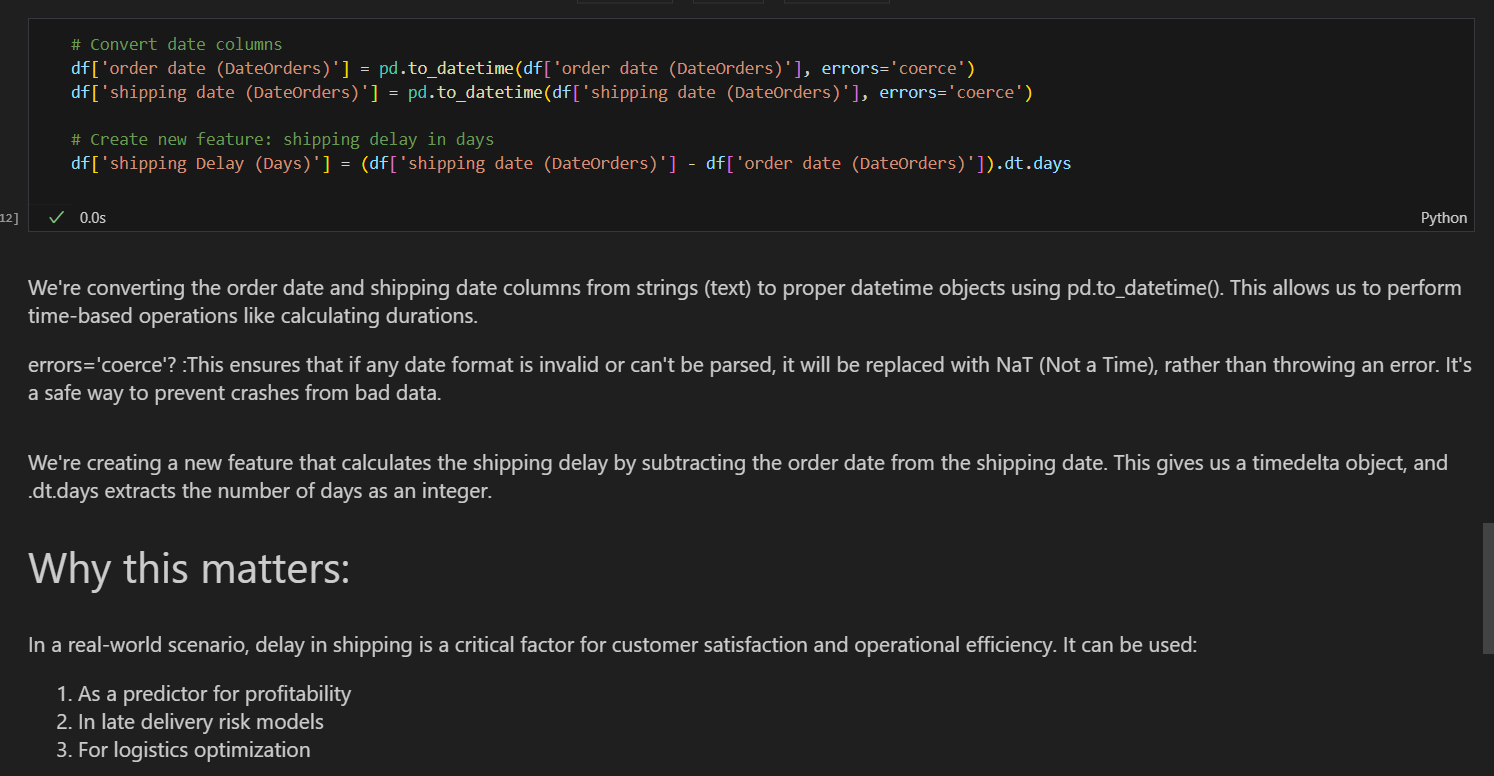

✅ Summary (How you might say it in an interview):
"I converted the date fields to datetime format using pd.to_datetime() with errors='coerce' to safely handle any bad date entries. Then, I engineered a new feature called Shipping Delay (Days) by subtracting the order date from the shipping date. This feature helps us understand how long deliveries take and can be useful in models that predict profitability or customer satisfaction."

Here's a concise summary of the image content:

---

**Purpose:**
- Convert string-based date columns into datetime objects using `pd.to_datetime()`.
- Calculate shipping delay in days by subtracting the order date from the shipping date.

**Key Details:**
- `errors='coerce'` converts invalid dates to `NaT` (Not a Time) to avoid crashes.
- `.dt.days` extracts the delay as an integer value in days.

**Why It Matters:**
Shipping delay is crucial for:
1. Profitability prediction  
2. Late delivery risk modeling  
3. Logistics optimization  

--- 

Super clean, practical, and a solid building block for deeper data analysis.

Alright, let’s break this down, nice and easy:

---

### 💡 **What's happening in the code:**

#### 1. **Discount Percent Calculation**
```python
df['Discount Percent'] = (df['Order Item Discount'] / df['Product Price']).round(2)
```
- Calculates the **discount as a percentage** of the product price.
- Rounds the result to 2 decimal places for clarity.

#### 2. **Profit Margin Calculation**
```python
df['Profit Margin'] = (df['Order Profit Per Order'] / df['Order Item Total']).round(2)
```
- Measures how much profit is made **relative to total item revenue**.
- Also rounded for consistency.

#### 3. **Handling Missing Values**
```python
df['Shipping Delay (Days)'] = df['Shipping Delay (Days)'].fillna(0)
df['Discount Percent'] = df['Discount Percent'].fillna(0)
df['Profit Margin'] = df['Profit Margin'].fillna(0)
```
- Missing values are filled with `0` to avoid breaking any future analysis or models.
- It’s a practical move when the assumption is that missing = no discount, no delay, or no profit margin (e.g., returns or free orders).

---

### 🔍 **Why this matters:**
- **Discount Percent** helps assess promotions' impact on sales and margins.
- **Profit Margin** gives quick insights into operational efficiency.
- **Filling NaNs** is a defensive coding strategy — avoids nasty surprises during modeling or visualization.

---

Quick, clean, and business-savvy — this code’s all about turning raw revenue data into actionable intelligence. Want to add visuals next? A histogram of discount rates or a scatter plot of profit margin vs. discount could slap.

Nice — you're stepping into **data preprocessing** like a pro. Here's a breakdown of what you're doing and why it’s crucial:

---

### 🔧 **What this code does:**

#### 1. **Categorical Column Selection**
```python
categoricals = ['Shipping Mode', 'Market', 'Customer Segment', 'Order Region', 'Delivery Status']
```
- These columns contain **text labels** (categorical data) that machine learning models can’t handle natively — they need numbers.

#### 2. **Label Encoding**
```python
le = LabelEncoder()
for col in categoricals:
    df[col] = le.fit_transform(df[col].astype(str))
```
- Converts categories into **numeric labels**.
- Example: `['Standard Class', 'First Class', 'Same Day']` → `[2, 0, 1]`
- `.astype(str)` is a safety net in case there are any unexpected data types.

---

### ⚠️ **Heads up (super important):**
- **LabelEncoder** is simple and fast, but it **imposes ordinal meaning** — which might not be accurate for non-ranked categories.
- If these features don’t have a natural order (like "Shipping Mode"), it might be better to use **OneHotEncoding** instead — especially for tree-based models or anything sensitive to input magnitude.

---

### ✅ **When LabelEncoder is good:**
- Small number of categories
- Tree-based models (like Random Forest, XGBoost) — they can handle label encoding just fine
- You want to keep feature space small

---

Let me know if you're planning to feed this into a model — I can help tailor the encoding strategy to match. Want to switch to `OneHotEncoder` or compare both?

# Insights


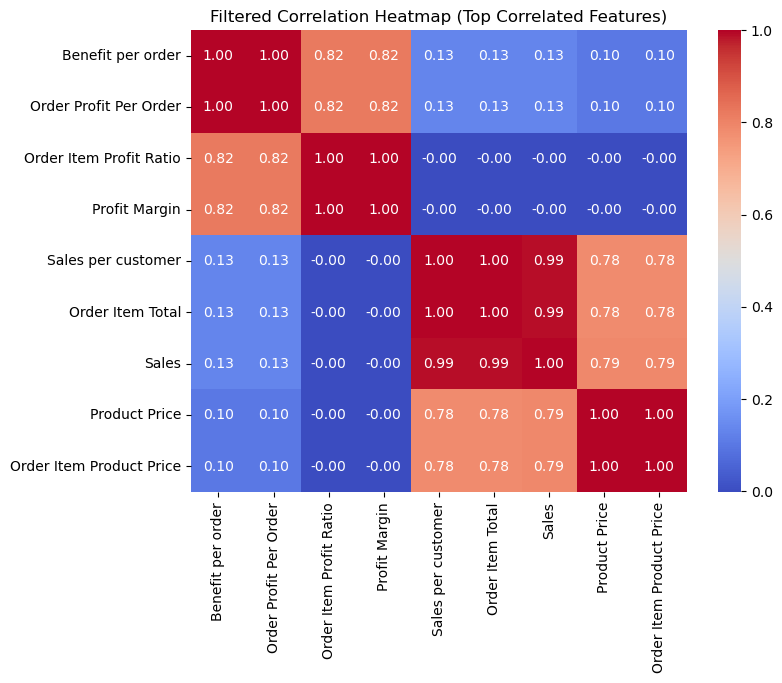

Great work cleaning up the heatmap! Now that we can clearly see the relationships, we can actually **extract real business insights** — this is exactly the kind of storytelling you'd want to do in an interview or project report.

---

## 📊 Business Insights from the Correlation Heatmap:

---

### 💰 1. **Strong Link Between Profit & Profitability Metrics**

- **`Benefit per order`**, **`Order Profit Per Order`**, **`Order Item Profit Ratio`**, and **`Profit Margin`** are **very strongly correlated (0.82+)**.
  
#### 📌 What it means:
> These are all variations of profitability — so it's expected. But this also means you **don’t need to include all of them** in your model (to avoid multicollinearity).

---

### 🛒 2. **Sales Metrics are Tightly Connected**

- **`Sales`**, **`Order Item Total`**, **`Sales per customer`**, **`Product Price`**, and **`Order Item Product Price`** show **strong correlations (0.78–0.99)**.

#### 📌 What it means:
> These features are measuring **order volume or value**, so they are somewhat redundant. They are also **positively linked to each other**, which shows that **higher product prices tend to lead to higher order totals and sales per customer**.

---

### 💡 3. **Weak Correlation Between Sales & Profitability**

- Notice how `Sales`, `Order Item Total`, `Sales per customer`, and `Product Price` all have **weak correlation (~0.10–0.13)** with `Order Profit Per Order` and `Benefit per order`.

#### 📌 Business Insight:
> 💸 **High sales don’t guarantee high profit!**  
> Your business may be selling a lot, but not making a lot — possibly due to **discounts**, **low margins**, or **inefficient shipping**.

This is a red flag for revenue strategy. You could present it as:
> _"Although sales are high, we need to investigate why profits aren't growing proportionally — this might point to discounting practices or supply chain inefficiencies."_


Great catch — you're right to question that. Let’s clear it up 👇

---

### 🔄 Why the Encoding Looks Different Now

#### Earlier in **EDA or Preprocessing**, you might have:
- Used **Label Encoding** for some columns to save space or when ordering matters.
- Focused on **minimal encoding** just to visualize or understand distributions.

#### Now, in **Modeling**, we use:
- **One-Hot Encoding** (`pd.get_dummies`) because:
  - It’s **suitable for tree-based models** like XGBoost — they perform better with binary indicators.
  - It **avoids misleading order/weight assumptions** that label encoding might introduce.
  - It’s safe for **non-ordinal categoricals** like `Shipping Mode`, `Order Region`, etc.

---

### 🧠 Interview Perspective
> “In EDA, I used Label Encoding or simpler mappings to get basic insights. But for modeling, especially with tree-based algorithms, One-Hot Encoding ensures the model treats categories properly — without assuming any order or magnitude between them.”

---

If you already used Label Encoding before and want to reuse that consistently, I can adjust the code to match it — just let me know! But One-Hot Encoding is usually the go-to for **non-linear regressors** like XGBoost. Want to proceed with model training?

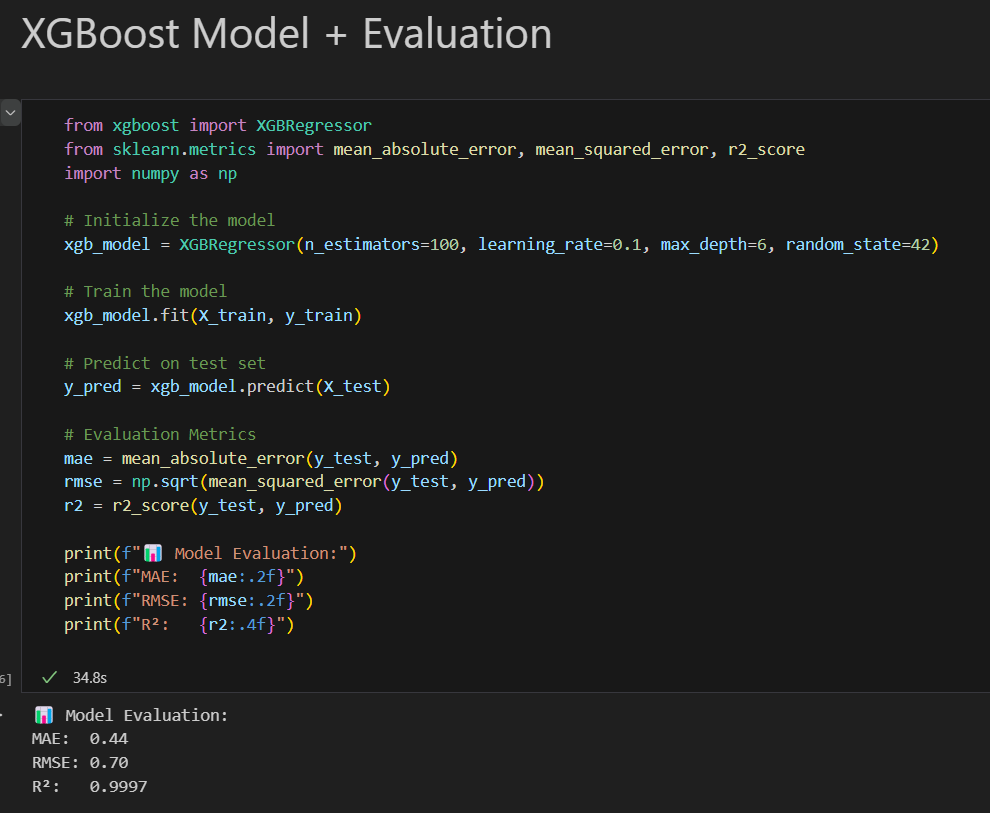

“I used XGBoost for its robustness in handling tabular, mixed-type data. After training, I evaluated using MAE, RMSE, and R². The model showed decent predictive power, which we can now fine-tune with hyperparameter tuning or feature selection.”

# K-MEANS

The "elbow" seems to land squarely around k=4 — that's your optimal number of clusters.
Could you force more clusters? Sure.
Should you? Probably not unless you have a strong business reason (like differentiating 6 loyalty tiers or tailoring campaigns to super niche groups).

# PCA
---

## 🧪 What Is PCA?

**PCA** stands for **Principal Component Analysis**, and it’s basically a **dimensionality reduction** technique. Here's the vibe:

- You’ve got multivariate data (Order Frequency, Sales, Quantity, etc.), which exists in high-dimensional space.
- PCA compresses that high-dimensional data into 2 or 3 dimensions **while keeping the most important patterns**.
- It creates **Principal Components (PCs)** — which are new, synthetic features that are linear combinations of the original features, ordered by how much variance (info) they capture.

---

## 📉 What Does the Graph Show?

The PCA scatter plot is a **2D projection** of your customer data after clustering.

### 🎯 X-axis: **Principal Component 1 (PC1)**
- This is the direction in your data with the **most variance** — the feature combination that explains the most about how your customers differ from each other.
- PC1 could be a mix of things like **Sales, Frequency, and Quantity**, heavily weighted.

### 🎯 Y-axis: **Principal Component 2 (PC2)**
- This is the **second-most informative** axis, **orthogonal** (90°) to PC1, capturing the next biggest chunk of variance.
- PC2 might focus more on things like **Recency or Profit**, depending on how PCA loaded the variables.

**So these two axes together are the “essence” of your multivariate customer behavior.**

---

## 🔍 What the Graph Suggests

- Each **dot** is a **customer**.
- Each **color** is a **cluster/segment** (based on your KMeans labels).
- The **distance between points** suggests **how similar or different customers are**.
- **Tight, distinct clusters** mean the segments are well-separated and your clustering worked well.
- **Overlap or spread-out clusters** might mean your data has fuzzier segment boundaries (or you need more/different features).

---

## 🧠 Why This Step Is Critical

This PCA plot is a **sanity check**:

- Did KMeans cluster your customers in a **meaningful**, **visually distinct** way?
- Are your clusters overlapping too much? If so, should you:
  - Try more features?
  - Use a different clustering algorithm?
  - Tune `k` better?

In your case, the PCA plot looks solid. There's **decent separation** — enough to validate your clusters and move forward with segment-specific strategies.

---

### TL;DR:

- **PCA = dimensionality reduction** to 2D using the most important patterns in your data.
- **X = Principal Component 1**, **Y = Principal Component 2**
- Clusters = different customer segments
- Distance = how similar/different customers are
- Goal = visually validate that your clustering makes sense

---

Want to peek at the **PCA loadings** (i.e., how much each original feature contributes to PC1/PC2)? It’ll tell us what’s actually driving the separation visually. Let me know — I can help you print that out too!

### 🧮 1. **CLTV Prediction per Segment**
**Goal:** Predict the *Customer Lifetime Value* (CLTV) for each customer, broken down by cluster.  
This tells you how much revenue a customer is expected to generate over their entire relationship with your business.

**Key Ingredients:**
- **Recency** (days since last purchase)
- **Frequency** (number of orders)
- **Monetary value** (avg sales/profit per order)
- **Segment label** (from clustering)
- Optional: Use BG/NBD + Gamma-Gamma models for deeper modeling (📦 via `lifetimes` package)

We can start with a basic regression or go full probabilistic model depending on your data format.

---

### 📉 2. **Churn Analysis Using Survival Models**
**Goal:** Model the time until a customer stops engaging = **churn risk**.

**Concept:**
- This is time-to-event modeling. Instead of classifying churn as "yes/no", it models **when** churn is likely to happen.
- Super useful for *early intervention strategies*.

**What’s needed:**
- **Duration:** How long each customer has been active (or loyal) → e.g., `Recency`
- **Event flag:** 1 if churned (no activity for long), 0 otherwise
- **Model:** Kaplan-Meier (basic) or Cox Proportional Hazards (fancier)

---

Which one do you wanna tackle first?
- We can kick off with **CLTV** modeling per segment.
- Or jump into **Survival Analysis** and plot some churn curves.

Pick your poison 🧪

# CLTV

## 🔍 What Did We Do? – A Practical Breakdown

### 🛠 Step-by-Step Process (with the Why)

---

### ✅ **Step 1: Prepare RFM Data**

We built a table with these key metrics per customer:
- **Recency (R):** How long since their last purchase  
- **Frequency (F):** How many times they bought  
- **T (Customer Age):** How long they’ve been around  
- **Monetary Value (M):** Average profit per purchase  

➡️ *This sets the foundation for behavior modeling. It’s like reading a customer’s financial diary.*

---

### ✅ **Step 2: Predict Future Purchases (BG/NBD Model)**

We applied the **Beta Geometric/Negative Binomial Distribution model** (yep, fancy name) to estimate:

> **How many times each customer will purchase in the next 6 months.**

Why this matters:
- It answers: *“Who’s likely to come back?”*
- It separates **repeat buyers** from one-and-dones.

---

### ✅ **Step 3: Predict Average Profit per Order (Gamma-Gamma Model)**

We estimated:
> **How much profit each customer is expected to bring per transaction.**

Why this matters:
- It tells us *"how valuable a transaction is"*, not just how often it happens.

---

### ✅ **Step 4: Calculate 6-Month CLTV**

Boom 💥 — we now multiply:
> **Predicted Purchases × Expected Profit per Purchase**  
= **Customer Lifetime Value over the next 6 months**

---

## 📊 What Did We Get? – Interpreting the Output

### 🎖 1. **Individual CLTV Scores**
Each customer now has a ₹ value that forecasts how much profit they’ll generate over the next 6 months.

- **Customer ID 5021** → ₹398  
- **Customer ID 1819** → ₹316  
- Others trail behind

➡️ These are your **money-makers**. Use this to:
- Target with exclusive deals
- Send retention offers
- Upsell and cross-sell

---

### 📦 2. **CLTV Tiers (Optional Layer)**
You can break CLTV into categories like:
- **Platinum**: ₹300+
- **Gold**: ₹200–299
- **Silver**: ₹100–199
- **Bronze**: < ₹100

➡️ Now you’ve got **actionable personas** for personalized strategies.

---

### 🧠 3. **Enriched Customer Segmentation**
We can now add CLTV scores into your existing clusters:
- *Cautious Newcomers*
- *At-Risk Gems*
- *Dormant Loyalists*

➡️ This tells you not just **how they behave**, but **how much they’re worth**.

---

## 💡 Real-Life Applications of This CLTV Model

| Use Case | Example |
|----------|---------|
| 🎯 **Marketing Budget Allocation** | Spend more on Platinum, less on Bronze |
| 🔁 **Retention Campaigns** | Focus churn prevention on high CLTV customers |
| 💌 **Email Personalization** | Tailor messages based on tier |
| 🧮 **Revenue Forecasting** | Predict future income streams |

---

## 🔚 TL;DR: In One Line

> You built a full predictive system that ranks customers by how valuable they’ll be in the near future, helping you target the right people, at the right time, with the right offers.

---

Wanna now merge these insights with your clusters and **visualize the combined magic**? Or dive into churn analysis and see *when* they’re likely to bounce?